In [2]:
# import the necessary packages
from pyimagesearch.siamese_net import build_siamese_model
from pyimagesearch import metrics
from pyimagesearch import config
from pyimagesearch import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
print(config.EPOCHS)
print(config.IMG_SHAPE)
print(config.BATCH_SIZE)

500
(42,)
16


In [4]:
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [5]:
dataset = 'model/keypoint_classifier/keypoint.csv'
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
trainX, testX, trainY, testY = train_test_split(X_dataset, y_dataset, train_size=0.85, random_state=RANDOM_SEED)
                       

In [6]:
print('train images shape',trainX.shape)
print('lables train',trainY.shape)
print('test images shape',testX.shape)
print('labels test',testY.shape)

train images shape (3206, 42)
lables train (3206,)
test images shape (566, 42)
labels test (566,)


In [7]:
# prepare the positive and negative pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = utils.make_pairs(trainX, trainY)
(pairTest, labelTest) = utils.make_pairs(testX, testY)

# pair shape
print(pairTrain.shape)
print(labelTrain.shape)

print(pairTest.shape)
print(labelTest.shape)

[INFO] preparing positive and negative pairs...
(6412, 2, 42)
(6412, 1)
(1132, 2, 42)
(1132, 1)


In [8]:
# this block is different from the previous trained binary cross entropy siamese mode 
# configure the siamese network
print("[INFO] building siamese network...")
imgA = Input(shape=config.IMG_SHAPE)
imgB = Input(shape=config.IMG_SHAPE)
print(imgA.shape)
featureExtractor = build_siamese_model(config.IMG_SHAPE)
featsA = featureExtractor(imgA)
featsB = featureExtractor(imgB)
print(featsA.shape)

# finally, construct the siamese network
distance = Lambda(utils.euclidean_distance)([featsA, featsB])
# outputs = Dense(1, activation="sigmoid")(distance) this is not include instead in contrastive loss model
model = Model(inputs=[imgA, imgB], outputs=distance)

[INFO] building siamese network...
(None, 42)
(None, 256)


In [9]:
model_save_path = 'output/saving_model/mudassar_contranstive_loss_siamese.hdf5'
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1)

In [10]:
# compile the model
print("[INFO] compiling model...")
# model.compile(loss=metrics.contrastive_loss, optimizer="adam",
# 	metrics=["accuracy"])
model.compile(loss=metrics.contrastive_loss, optimizer="adam")

[INFO] compiling model...


In [11]:
# train the model
print("[INFO] training model...")
history = model.fit(
	[pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:],
	validation_data=([pairTest[:, 0], pairTest[:, 1]], labelTest[:]),
	batch_size=config.BATCH_SIZE, 
	epochs=config.EPOCHS,
    callbacks=[cp_callback, es_callback])

[INFO] training model...
Epoch 1/500
401/401 [==============================] - 2s 4ms/step - loss: 2.3617 - val_loss: 0.4006

Epoch 00001: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 2/500
401/401 [==============================] - 1s 1ms/step - loss: 0.2928 - val_loss: 0.3176

Epoch 00002: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 3/500
401/401 [==============================] - 1s 1ms/step - loss: 0.2491 - val_loss: 0.2184

Epoch 00003: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 4/500
401/401 [==============================] - 1s 2ms/step - loss: 0.2206 - val_loss: 0.1883

Epoch 00004: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 5/500
401/401 [==============================] - 1s 1ms/step - loss: 0.1925 - val_loss: 0.1545

Epoch 00005: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 6/500
401/401 

401/401 [==============================] - 1s 2ms/step - loss: 0.1080 - val_loss: 0.1153

Epoch 00044: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 45/500
401/401 [==============================] - 1s 1ms/step - loss: 0.1005 - val_loss: 0.1113

Epoch 00045: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 46/500
401/401 [==============================] - 1s 2ms/step - loss: 0.1097 - val_loss: 0.0993

Epoch 00046: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 47/500
401/401 [==============================] - 1s 2ms/step - loss: 0.1025 - val_loss: 0.1135

Epoch 00047: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 48/500
401/401 [==============================] - 1s 1ms/step - loss: 0.1018 - val_loss: 0.1066

Epoch 00048: saving model to output/saving_model\mudassar_contranstive_loss_siamese.hdf5
Epoch 49/500
401/401 [==============================]

[INFO] saving siamese model...
INFO:tensorflow:Assets written to: output\contrastive_siamese_model\assets
[INFO] plotting training history...


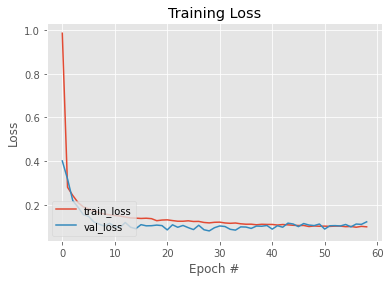

In [12]:
print("[INFO] saving siamese model...")
model.save(config.MODEL_PATH_Con)
# plot the training history
print("[INFO] plotting training history...")
utils.plot_training_Con(history, config.PLOT_PATH_Con)

In [13]:
results = model.evaluate([pairTest[:,0], pairTest[:,1]], labelTest[:]) 
print("test loss, test acc:", results)

36/36 [==============================] - 0s 860us/step - loss: 0.1213
test loss, test acc: 0.12126298248767853


In [14]:
anchors_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\anchors.csv"
test_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\test.csv"
anchors = np.loadtxt(anchors_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
#print(anchors)
testing = np.loadtxt(test_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [15]:
out_preds = []
for anchor in anchors:
#     print(type(testing))
#     print(type(anchor))
    out_preds.append(model.predict([np.expand_dims(anchor, axis = 0), np.expand_dims(testing, axis = 0)]))
gg= np.argmin(out_preds)
print(out_preds)
print(gg)

[array([[0.6697108]], dtype=float32), array([[0.5512086]], dtype=float32), array([[0.83712345]], dtype=float32), array([[0.23431748]], dtype=float32), array([[0.45442966]], dtype=float32), array([[0.65239626]], dtype=float32), array([[0.84404653]], dtype=float32), array([[0.7950879]], dtype=float32), array([[0.8087546]], dtype=float32), array([[0.61721414]], dtype=float32), array([[0.5845502]], dtype=float32), array([[0.7747625]], dtype=float32), array([[0.02224771]], dtype=float32)]
12


In [16]:
with open('model/keypoint_classifier/keypoint_classifier_label.csv',
            encoding='utf-8-sig') as f:
    
    keypoint_classifier_labels = csv.reader(f)
    keypoint_classifier_labels = [
        row[0] for row in keypoint_classifier_labels
    ]
    print(keypoint_classifier_labels)
    
aa =keypoint_classifier_labels[gg]
print(aa)

['I', 'Love', 'You', 'Play', 'How', 'Football', 'Fine', 'Am', 'cricket', 'Excellent', 'Reverse', 'Funny', 'help']
help


In [ ]:

for anchor in anchors:
    
#     print(type(testing))
#     print(type(anchor))
    a= model.predict([np.expand_dims(anchor, axis = 0), np.expand_dims(testing, axis = 0)])
    #print(a)
    print(a[0][0])
    

In [ ]:
print(model.summary())

In [17]:
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
tflite_save_path = 'netron model shapes/contranstive/contranstive.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpe9t27jed\assets


43408

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])